<a href="https://colab.research.google.com/github/Rmianm/Modelos-de-clustering/blob/master/KMeans(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Agrupando los datos
* grupos: Virginica, Versicolor y Setosa
* 50 muestras de cada especia
* los divide de acuerdo al Largo y ancho del sépalo y pétalo.

In [30]:
from sklearn.cluster import KMeans
from sklearn import datasets #nos permite cargar el dataset de interés
import pandas as pd

In [31]:
import matplotlib.pyplot as plt

In [32]:
#Primera forma de cargar los datos
X_iris, Y_iris = datasets.load_iris(return_X_y=True, as_frame = True) 

In [ ]:
#Segunda forma (Ya conocemos las variables a cargar)
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])

In [ ]:
#Tercera
iris = datasets.load_iris() 
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns = ['Target'])

In [ ]:
X_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'Petal Width')

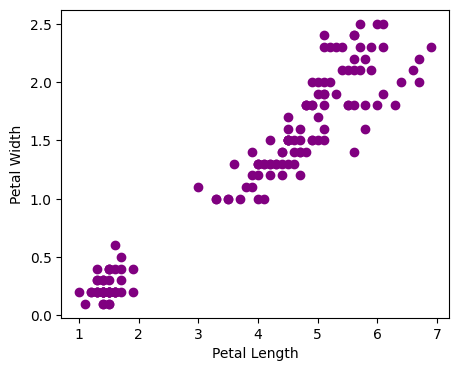

In [ ]:
#Graficamos dos variables, solo para ver a grandes rasgos cuántos grupos podrían haber
plt.figure(figsize=(5,4))
plt.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'], c = 'purple')
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)

##Construcción y evaluación del modelo con K-Means
####el número de clusters puede ir variando, eso nos corresponde establecerlo de acuerdo domo va actuando nuestras métricas y gráficas. En nuestro caso lo hacemos a manera de práctica por eso vamos a la fija con 3, pero tú puedes cambiarlo para que te des cuenta. 
####En cada iteración, el algoritmo KMeans actualiza los centroides de los clusters y reasigna cada punto de datos al cluster más cercano. El objetivo del algoritmo es minimizar la suma de las distancias al cuadrado entre cada punto de datos y el centroide del cluster correspondiente.

In [ ]:
model = KMeans(n_clusters = 3,max_iter = 2000) 
model.fit(X_iris)
y_labels = model.labels_ #todas aquellas etiquetas encontradas basadas en similitud se almacenan en y_labels

In [42]:
#en lugar de y_labels puedes usar:
model = KMeans(n_clusters = 3,max_iter = 2000)
y_kmeans = model.predict(X_iris) 

In [44]:
from sklearn import metrics # ayuda generar el accuracy
accuracy = metrics.adjusted_rand_score(Y_iris, y_labels)
print(accuracy)
#Da lo mismo con y_kmeans y y_labels

0.7302382722834697


Text(0, 0.5, 'Petal Width')

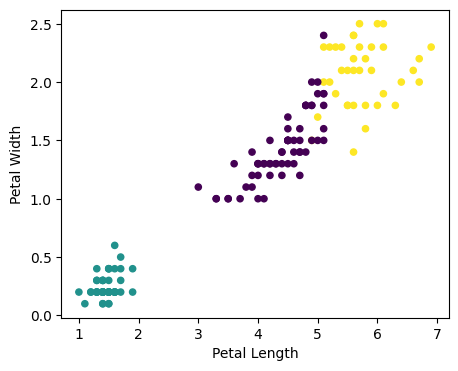

In [46]:
#Puedes volver a graficar lo anterior para ver cuánto cambió en cuanto a grupos
plt.figure(figsize=(5,4))
plt.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'], c = y_labels,s=20)
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)